# Linear regression with suitable measures of fit

## Libraries and settings

In [1]:
# Libraries
import os
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error



# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())

/workspaces/DA_Project/Project/Minimum/6&7


## Import the apartment data

In [2]:
# Read data to pandas data frame
df_orig = pd.read_csv('bmw_data_prepared.csv', 
                      sep=',', 
                      encoding='utf-8')

# Copy of data with selected colums
columns = [ 'web-scraper-order', 
                'model_raw',
                'Location',
                'PLZ',
                'Year',
                'price',
                'km',
                'luxury',
                'competition',
                'xDrive',
                'automat',
                'km_cat',
                'km_per_year',]
df = df_orig[columns]

# Rename variable 'web-scraper-order' to 'apmt_id'
df_orig = df_orig.rename(columns={'web-scraper-order': 'id'})

# Remove missing values
df = df_orig.dropna()
df.head(5)

# Remove duplicates
df = df.drop_duplicates()

# Remove some 'extreme' values
df = df.loc[(df['price'] >= 2000) & 
            (df['price'] <= 100000)]

print(df.shape)
df.head(5)

(847, 19)


,id,web-scraper-start-url,text_raw,price_raw,model_raw,type_year_km_transmission_fuel,Location,PLZ,km_raw,Year,price,km,luxury,competition,xDrive,automat,km_cat,km_per_year,km_per_year_cat
0,1705078003-1,https://www.comparis.ch/carfinder/marktplatz/b...,BMW X3 X3 XDRIVE 20D XLINE STEPTRONICCHF 22'90...,CHF 22'900,X3 xDrive 20d xLine Steptronic,Occasion05.2016119.500 kmAutomatDiesel1227 (GE),GE,1227,119.50,2016,22900,119500.0,0,0,1,1,50-120k,14937.50,medium
1,1705078003-2,https://www.comparis.ch/carfinder/marktplatz/b...,BMW 540 540ICHF 13'750AB CHF 220 / MONAT5 / 6O...,CHF 13'750,540i,Occasion05.2006124.900 kmAutomatBenzin4461 (BL),BL,4461,124.90,2006,13750,124900.0,0,0,0,1,120k+,6938.89,low
2,1705078003-3,https://www.comparis.ch/carfinder/marktplatz/b...,BMW 225 ACTIVE TOURER 225XE IPERFORMANCE ACTIV...,CHF 28'800,225xe iPerformance Active Tourer Steptronic M ...,Occasion09.201928.950 kmAutomatBenzin/Elektro4...,BL,4460,28.95,2019,28800,28950.0,0,0,0,1,0-50k,5790.00,low
4,1705078003-5,https://www.comparis.ch/carfinder/marktplatz/b...,BMW 530 530XI STEPTRONICCHF 10'900AB CHF 175 /...,CHF 10'900,530xi Steptronic,Occasion06.2008160.000 kmAutomatBenzin6010 (LU),LU,6010,160.00,2008,10900,160000.0,0,0,0,1,120k+,10000.00,low
5,1705078003-6,https://www.comparis.ch/carfinder/marktplatz/b...,BMW X5 X5 XDRIVE 40D STEPTRONICCHF 33'900AB CH...,CHF 33'900,X5 xDrive 40d Steptronic,Occasion04.2015125.900 kmAutomatDiesel6964 (TI),TI,6964,125.90,2015,33900,125900.0,0,0,1,1,120k+,13988.89,medium


## Simple linear regression (only one explanatory variable in the model)

### Create train and test samples (train = 80%, test = 20% of the data)

In [3]:
# Create train and test samples
X_train, X_test, y_train, y_test = train_test_split(df['km'], 
                                                    df['price'], 
                                                    test_size=0.20, 
                                                    random_state=42)
# Show X_train
print('X_train:')
print(X_train.head(), '\n')

# Show y_train
print('y_train:')
print(y_train.head())

X_train:
383    151000.0
966     27000.0
2       28950.0
338    178000.0
773    285776.0
Name: km, dtype: float64 

y_train:
383     6999
966    39900
2      28800
338     7500
773     3900
Name: price, dtype: int64


### Fit the simple linear regression model

In [4]:
# Fit the regression model
slope, intercept, r, p, std_err = stats.linregress(X_train, y_train)

# Print results of the regression model
print('Linear regression result:')
print(f'Intercept with y-axis (alpha):            {intercept:.2f}')
print(f'Slope of regression line (beta):          {slope:.3f}')
print(f'p-value:                                  {p:.4f}')
print(f'R-squared (coefficient of determination): {r**2:.4f}')

Linear regression result:
Intercept with y-axis (alpha):            57029.72
Slope of regression line (beta):          -0.222
p-value:                                  0.0000
R-squared (coefficient of determination): 0.5016


### Interpretation

Intercept (Alpha): The intercept value of 57,029.72 suggests that when the independent variable (presumably 'km' in your case) is zero, the expected value of the dependent variable (presumably 'price') is approximately 57,029.72. In practical terms, this can be interpreted as the estimated starting price of a BMW vehicle before considering its mileage.

Slope (Beta): The slope value of -0.222 indicates the change in the dependent variable ('price') for each one-unit increase in the independent variable ('km'). Specifically, for each additional kilometer driven, the price of the BMW vehicle is expected to decrease by approximately 0.222 units. This negative relationship is typical for used cars, where higher mileage generally corresponds to lower prices.

P-value: A p-value of 0.0000 (typically rounded off to four decimal places) suggests that the relationship between mileage and price is statistically significant. In statistical terms, this low p-value (less than 0.05) strongly indicates that the slope is not zero, meaning there is a significant relationship between the car's mileage and its price.

R-squared (Coefficient of Determination): An R-squared value of 0.5016 (or 50.16%) indicates that approximately 50.16% of the variability in the dependent variable ('price') can be explained by the independent variable ('km') in your model. This value reflects a moderate level of explanatory power. In other words, while mileage does explain a significant portion of the variance in the price of BMW vehicles, nearly half of the variation in price is determined by other factors not included in the model.


# Function to calculate model predictions

In [5]:
def myfunc(x):
    return slope * x + intercept

# Predictions for Simple Linear Regression
simple_predictions = myfunc(X_test)

# RMSE and MAE for Simple Linear Regression
simple_rmse = np.sqrt(mean_squared_error(y_test, simple_predictions))
simple_mae = mean_absolute_error(y_test, simple_predictions)

print("Simple Linear Regression RMSE:", simple_rmse)
print("Simple Linear Regression MAE:", simple_mae)


Simple Linear Regression RMSE: 14544.30037379875
Simple Linear Regression MAE: 11648.537361076918


### Interpretation

Root Mean Square Error (RMSE) - 14,544.30: This value suggests that the average difference between the predicted and actual prices of BMW vehicles is about 14,544.30 units. RMSE is sensitive to large errors, meaning if your model makes a few substantial errors, the RMSE value will be significantly affected. It's useful for understanding the magnitude of error, but the context of your data's scale (like average price ranges) is crucial to determine if this is a high or low value.

Mean Absolute Error (MAE) - 11,648.54: The MAE indicates that, on average, your model's predictions are off by 11,648.54 units from the actual prices. Unlike RMSE, MAE doesn't penalize large errors as heavily, offering a more straightforward view of the average error.

### Plot regression line

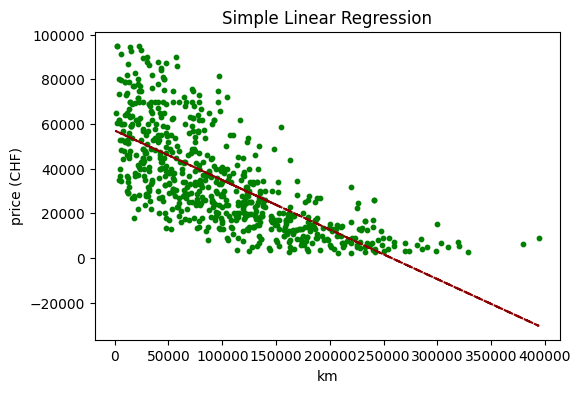

In [6]:
# Function to calculate model predictions
def myfunc(x):
    return slope * x + intercept

# Apply myfunc() to x, i.e. make predictions 
mymodel = pd.Series(map(myfunc, X_train))

# Scatterplot with regression line
plt.figure(figsize=(6,4))
plt.scatter(X_train, y_train, s=10, color='green')
plt.plot(X_train, mymodel, color='darkred', linestyle='dashed')
plt.title('Simple Linear Regression')
plt.xlabel('km')
plt.ylabel('price (CHF)')

plt.show()

### Check model residuals (residuals = observed prices minus predicted prices)

In [7]:
# Calculate model residuals for train data
residuals = y_train - mymodel

# Check the first residual value in our data set
print(f'1st Predicted price in dataset: {mymodel[0]:.2f}')
print(f'1st Observed price in dataset: {y_train[0]:.2f}')
print(f'1st Residual price in dataset: {residuals[0]:.2f}')

1st Predicted price in dataset: 23543.30
1st Observed price in dataset: 22900.00
1st Residual price in dataset: -643.30


### Plot histogram of residuals

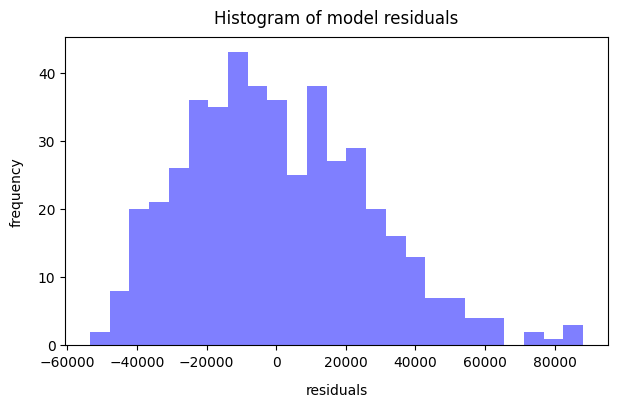

In [8]:
# Plot histogram of residuals
fig = plt.figure( figsize=(7,4))
n, bins, patches = plt.hist(x=residuals, 
                            bins=25, 
                            color='blue',
                            alpha=0.5
                   )

# Set title and labels
plt.xlabel('residuals', fontsize=10, labelpad=10)
plt.ylabel('frequency', fontsize=10, labelpad=10)
plt.title('Histogram of model residuals', fontsize=12, pad=10)

# Show plot
plt.show()

### Compare the observed prices with the predicted prices

In [9]:
# Create model predictions for test data
predicted = myfunc(X_test)
predicted.round(1)

# Compare the observed prices with the predicted prices
for i in range(0,10):
    print(f'Observed price: {y_test.iloc[i]:.1f}, Predicted price: {predicted.iloc[i]:.1f}')

Observed price: 22499.0, Predicted price: 43169.4
Observed price: 40999.0, Predicted price: 40286.5
Observed price: 31990.0, Predicted price: 39687.7
Observed price: 49900.0, Predicted price: 40574.8
Observed price: 12500.0, Predicted price: 18620.1
Observed price: 68690.0, Predicted price: 55843.3
Observed price: 59811.0, Predicted price: 55699.1
Observed price: 17800.0, Predicted price: 23210.7
Observed price: 29000.0, Predicted price: 45054.4
Observed price: 99900.0, Predicted price: 53370.6


## Multiple linear regression (more than one explanatory variable in the model)

### Create train and test samples (train = 80%, test = 20% of the data)

In [10]:
# Create train and test samples (we name it X2_ and y_2 because we already used X_ and y_ above)
X2_train, X2_test, y2_train, y2_test = train_test_split(df[['km',
                                                            'Year']], 
                                                        df['price'], 
                                                        test_size=0.20, 
                                                        random_state=42)

# Show X2_train
print('X2_train:')
print(X2_train.head(), '\n')

# Show y2_train
print('y2_train:')

print(y2_train.head())

X2_train:
           km  Year
383  151000.0  2013
966   27000.0  2023
2     28950.0  2019
338  178000.0  2008
773  285776.0  2007 

y2_train:
383     6999
966    39900
2      28800
338     7500
773     3900
Name: price, dtype: int64


### Fit the multiple regression model

In [11]:
# Add constant to the model
X2_train_const = sm.add_constant(X2_train)

# Create the multiple regression model
olsmod = sm.OLS(y_train, X2_train_const)
olsres = olsmod.fit()

# Print full model output
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     411.8
Date:                Sat, 13 Jan 2024   Prob (F-statistic):          1.41e-117
Time:                        22:28:10   Log-Likelihood:                -7475.4
No. Observations:                 677   AIC:                         1.496e+04
Df Residuals:                     674   BIC:                         1.497e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.471e+06   2.97e+05     -8.319      0.0

### Predictions for Multiple Linear Regression

In [12]:
multiple_predictions = olsres.predict(sm.add_constant(X2_test))

# RMSE and MAE for Multiple Linear Regression
multiple_rmse = np.sqrt(mean_squared_error(y2_test, multiple_predictions))
multiple_mae = mean_absolute_error(y2_test, multiple_predictions)

# Adjusted R-squared for Multiple Linear Regression
n = len(X2_test)
p = X2_train.shape[1]
adjusted_r_squared = 1 - (1 - olsres.rsquared) * (n - 1) / (n - p - 1)

print("Multiple Linear Regression RMSE:", multiple_rmse)
print("Multiple Linear Regression MAE:", multiple_mae)
print("Multiple Linear Regression Adjusted R-squared:", adjusted_r_squared)


Multiple Linear Regression RMSE: 14141.216900227055
Multiple Linear Regression MAE: 11075.605108807713
Multiple Linear Regression Adjusted R-squared: 0.5445611925496395


### Interpretation of the statistic results

RMSE (14,141.22): Indicates moderate prediction errors in the model.                                    
MAE (11,075.61): Shows average prediction errors are around 11,075.61 units.                
Adjusted R-squared (0.5446): Suggests the model explains about 54.46% of the variance in prices, which is a moderate fit

### Plot histogram of residuals

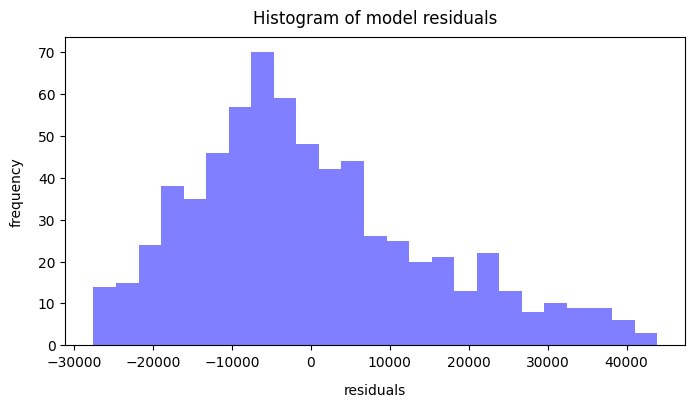

In [13]:
# Plot histogram of residuals
fig = plt.figure( figsize=(8,4))
n, bins, patches = plt.hist(x=olsres.resid, 
                            bins=25, 
                            color='blue',
                            alpha=0.5
                   )

# Set labels
plt.xlabel('residuals', fontsize=10, labelpad=10)
plt.ylabel('frequency', fontsize=10, labelpad=10)
plt.title('Histogram of model residuals', fontsize=12, pad=10)

plt.show()

### Compare the observed prices with the predicted prices

In [14]:
# Add constant to X2_test
X2_test_const = sm.add_constant(X2_test)
predicted_new = olsres.predict(X2_test_const)

# Compare the observed prices with the predicted prices
for i in range(0,10):
    print(f'Observed price: {y_test.iloc[i]:.1f}, Predicted price: {predicted_new.iloc[i]:.1f}')

Observed price: 22499.0, Predicted price: 45190.5
Observed price: 40999.0, Predicted price: 41949.1
Observed price: 31990.0, Predicted price: 35284.1
Observed price: 49900.0, Predicted price: 43398.5
Observed price: 12500.0, Predicted price: 18233.1
Observed price: 68690.0, Predicted price: 57694.6
Observed price: 59811.0, Predicted price: 57595.0
Observed price: 17800.0, Predicted price: 25154.4
Observed price: 29000.0, Predicted price: 42741.5
Observed price: 99900.0, Predicted price: 54736.5


### Statistical measures (min, max std, mean, median, count) for ratings

In [15]:
df.describe()

,PLZ,km_raw,Year,price,km,luxury,competition,xDrive,automat,km_per_year
count,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000
mean,6006.105077,100.331434,2016.351830,34602.563164,100331.434475,0.027155,0.033058,0.664699,0.885478,13807.413648
std,2623.609855,70.864763,5.437062,22443.445174,70864.763063,0.162630,0.178893,0.472375,0.318632,6475.976178
min,1000.000000,1.000000,1982.000000,2000.000000,1000.000000,0.000000,0.000000,0.000000,0.000000,1000.000000
25%,3930.000000,43.000000,2014.000000,16500.000000,43000.000000,0.000000,0.000000,0.000000,1.000000,9573.145000
50%,6331.000000,87.500000,2018.000000,29990.000000,87500.000000,0.000000,0.000000,1.000000,1.000000,13222.220000
75%,8404.000000,146.143000,2020.000000,49900.000000,146143.000000,0.000000,0.000000,1.000000,1.000000,17183.335000
max,9630.000000,394.000000,2023.000000,99900.000000,394000.000000,1.000000,1.000000,1.000000,1.000000,42000.000000


### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [16]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.2.0-1018-azure
Datetime: 2024-01-13 22:28:11
Python Version: 3.10.13
-----------------------------------
